In [79]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,classification_report, roc_auc_score,roc_curve
from imblearn.over_sampling import SMOTE
import joblib # for importing model i.e creating pkl file 

In [25]:
# load the dataset 

df = pd.read_csv('cleaned_data.csv')

In [26]:
df

,age,sex,hospitalized,is_elderly,drug_(METHOTREXATE),drug_5-ASA,drug_5-FLUOROURACIL,drug_ABACAVIR,drug_ABATACEPT,drug_ABATACEPT SUBQ INJECTION 125MG/ML,...,reaction_White blood cell count decreased,reaction_White blood cell count increased,reaction_Wound,reaction_Wound haemorrhage,reaction_Wound infection,reaction_Wrist fracture,reaction_Wrong technique in drug usage process,reaction_Wrong technique in product usage process,reaction_Yawning,reaction_Yellow skin
0,26.0,1.0,0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,77.0,2.0,0,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,48.0,2.0,0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,68.0,2.0,0,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,65.0,2.0,0,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6177,73.0,2.0,0,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6178,46.0,2.0,0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6179,50.0,1.0,0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6180,56.0,2.0,0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [28]:
df.isnull().sum()

age                                                  0
sex                                                  0
hospitalized                                         0
is_elderly                                           0
drug_(METHOTREXATE)                                  0
                                                    ..
reaction_Wrist fracture                              0
reaction_Wrong technique in drug usage process       0
reaction_Wrong technique in product usage process    0
reaction_Yawning                                     0
reaction_Yellow skin                                 0
Length: 2669, dtype: int64

In [31]:
df.columns

Index(['age', 'sex', 'hospitalized', 'is_elderly', 'drug_(METHOTREXATE)',
       'drug_5-ASA', 'drug_5-FLUOROURACIL', 'drug_ABACAVIR', 'drug_ABATACEPT',
       'drug_ABATACEPT SUBQ INJECTION 125MG/ML',
       ...
       'reaction_White blood cell count decreased',
       'reaction_White blood cell count increased', 'reaction_Wound',
       'reaction_Wound haemorrhage', 'reaction_Wound infection',
       'reaction_Wrist fracture',
       'reaction_Wrong technique in drug usage process',
       'reaction_Wrong technique in product usage process', 'reaction_Yawning',
       'reaction_Yellow skin'],
      dtype='object', length=2669)

In [35]:
X = df.drop(columns='hospitalized')

In [36]:
y = df['hospitalized']

In [37]:
print(f"Feature set shape: {X.shape}")
print(f"Target vector shape: {y.shape}")


Feature set shape: (6182, 2668)
Target vector shape: (6182,)


In [47]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)
# stratify : To keep the same proportion of hospitalized cases in train and test sets

In [44]:
print(f"Train size: {X_train.shape}, Test size: {X_test.shape}")


Train size: (4945, 2668), Test size: (1237, 2668)


In [66]:
model = RandomForestClassifier(class_weight='balanced', random_state=42)

In [67]:
model

RandomForestClassifier(class_weight='balanced', random_state=42)

In [ ]:

smote = SMOTE(k_neighbors=2, random_state=42)  # set k_neighbors < minority class samples
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)


In [80]:
# model training
model.fit(X_train,y_train)


RandomForestClassifier(class_weight='balanced', random_state=42)

In [81]:
# predictions
y_pred = model.predict(X_test)
# Predict probabilities for ROC-AUC and threshold tuning
y_proba = model.predict_proba(X_test)[:, 1]



In [82]:
y_proba

array([0.26, 0.37, 0.01, ..., 0.11, 0.76, 0.  ])

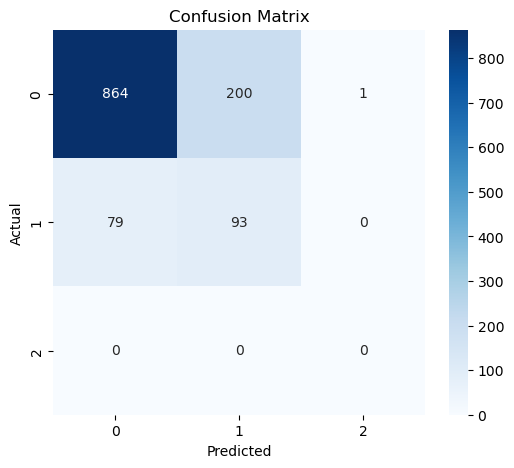

In [83]:
# confusion matrix 
cm = confusion_matrix(y_pred,y_test)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [84]:
from sklearn.metrics import classification_report

print("Classification Report:\n")
print(classification_report(y_test, y_pred))


Classification Report:

              precision    recall  f1-score   support

           0       0.81      0.92      0.86       943
           1       0.54      0.32      0.40       293
           2       0.00      0.00      0.00         1

    accuracy                           0.77      1237
   macro avg       0.45      0.41      0.42      1237
weighted avg       0.75      0.77      0.75      1237



/home/unique/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/unique/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/unique/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [85]:
df.sample()

,age,sex,hospitalized,is_elderly,drug_(METHOTREXATE),drug_5-ASA,drug_5-FLUOROURACIL,drug_ABACAVIR,drug_ABATACEPT,drug_ABATACEPT SUBQ INJECTION 125MG/ML,...,reaction_White blood cell count decreased,reaction_White blood cell count increased,reaction_Wound,reaction_Wound haemorrhage,reaction_Wound infection,reaction_Wrist fracture,reaction_Wrong technique in drug usage process,reaction_Wrong technique in product usage process,reaction_Yawning,reaction_Yellow skin
5556,89.0,2.0,0,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [89]:
# saving the model 
joblib.dump(model,'hospitalization_model.pkl')
feature_columns = X_train.columns.tolist()
joblib.dump(feature_columns, 'feature_columns.pkl')

['feature_columns.pkl']